<a href="https://colab.research.google.com/github/lidymonteiro/odgufrpe/blob/master/Machine_Learning_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Spotify -  SVM

* Kaggle: https://www.kaggle.com/geomack/spotifyclassification
* Aplicando SVM na classificação de músicas do Spotify para identificar possíveis músicas que um usuário poderia gostar.
* Treinamento do algoritmo, teste e validação do modelo.

# Importando as bibliotecas

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="whitegrid")

# Base de dados de músicas do Spotify

In [0]:
# Informações das Features da Base de dados.
# https://developer.spotify.com/web-api/get-audio-features/

In [54]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/BKP_ODG/data.csv")


In [199]:
df.head()

id  acousticness  danceability  ...  target      song_title            artist
0   0        0.0102         0.833  ...       1        Mask Off            Future
1   1        0.1990         0.743  ...       1         Redbone  Childish Gambino
2   2        0.0344         0.838  ...       1    Xanny Family            Future
3   3        0.6040         0.494  ...       1  Master Of None       Beach House
4   4        0.1800         0.678  ...       1  Parallel Lines       Junior Boys

[5 rows x 17 columns]

# Análise exploratória dos dados

In [200]:
# Verificando a coluna dos dados
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [201]:
df.shape

(2017, 17)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
id                  2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [203]:
# Verificando valores nulos
df.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [204]:
# Resumo estatístico da base de dados
df.describe()

id  acousticness  ...      valence       target
count  2017.000000   2017.000000  ...  2017.000000  2017.000000
mean   1008.000000      0.187590  ...     0.496815     0.505702
std     582.402066      0.259989  ...     0.247195     0.500091
min       0.000000      0.000003  ...     0.034800     0.000000
25%     504.000000      0.009630  ...     0.295000     0.000000
50%    1008.000000      0.063300  ...     0.492000     1.000000
75%    1512.000000      0.265000  ...     0.691000     1.000000
max    2016.000000      0.995000  ...     0.992000     1.000000

[8 rows x 15 columns]

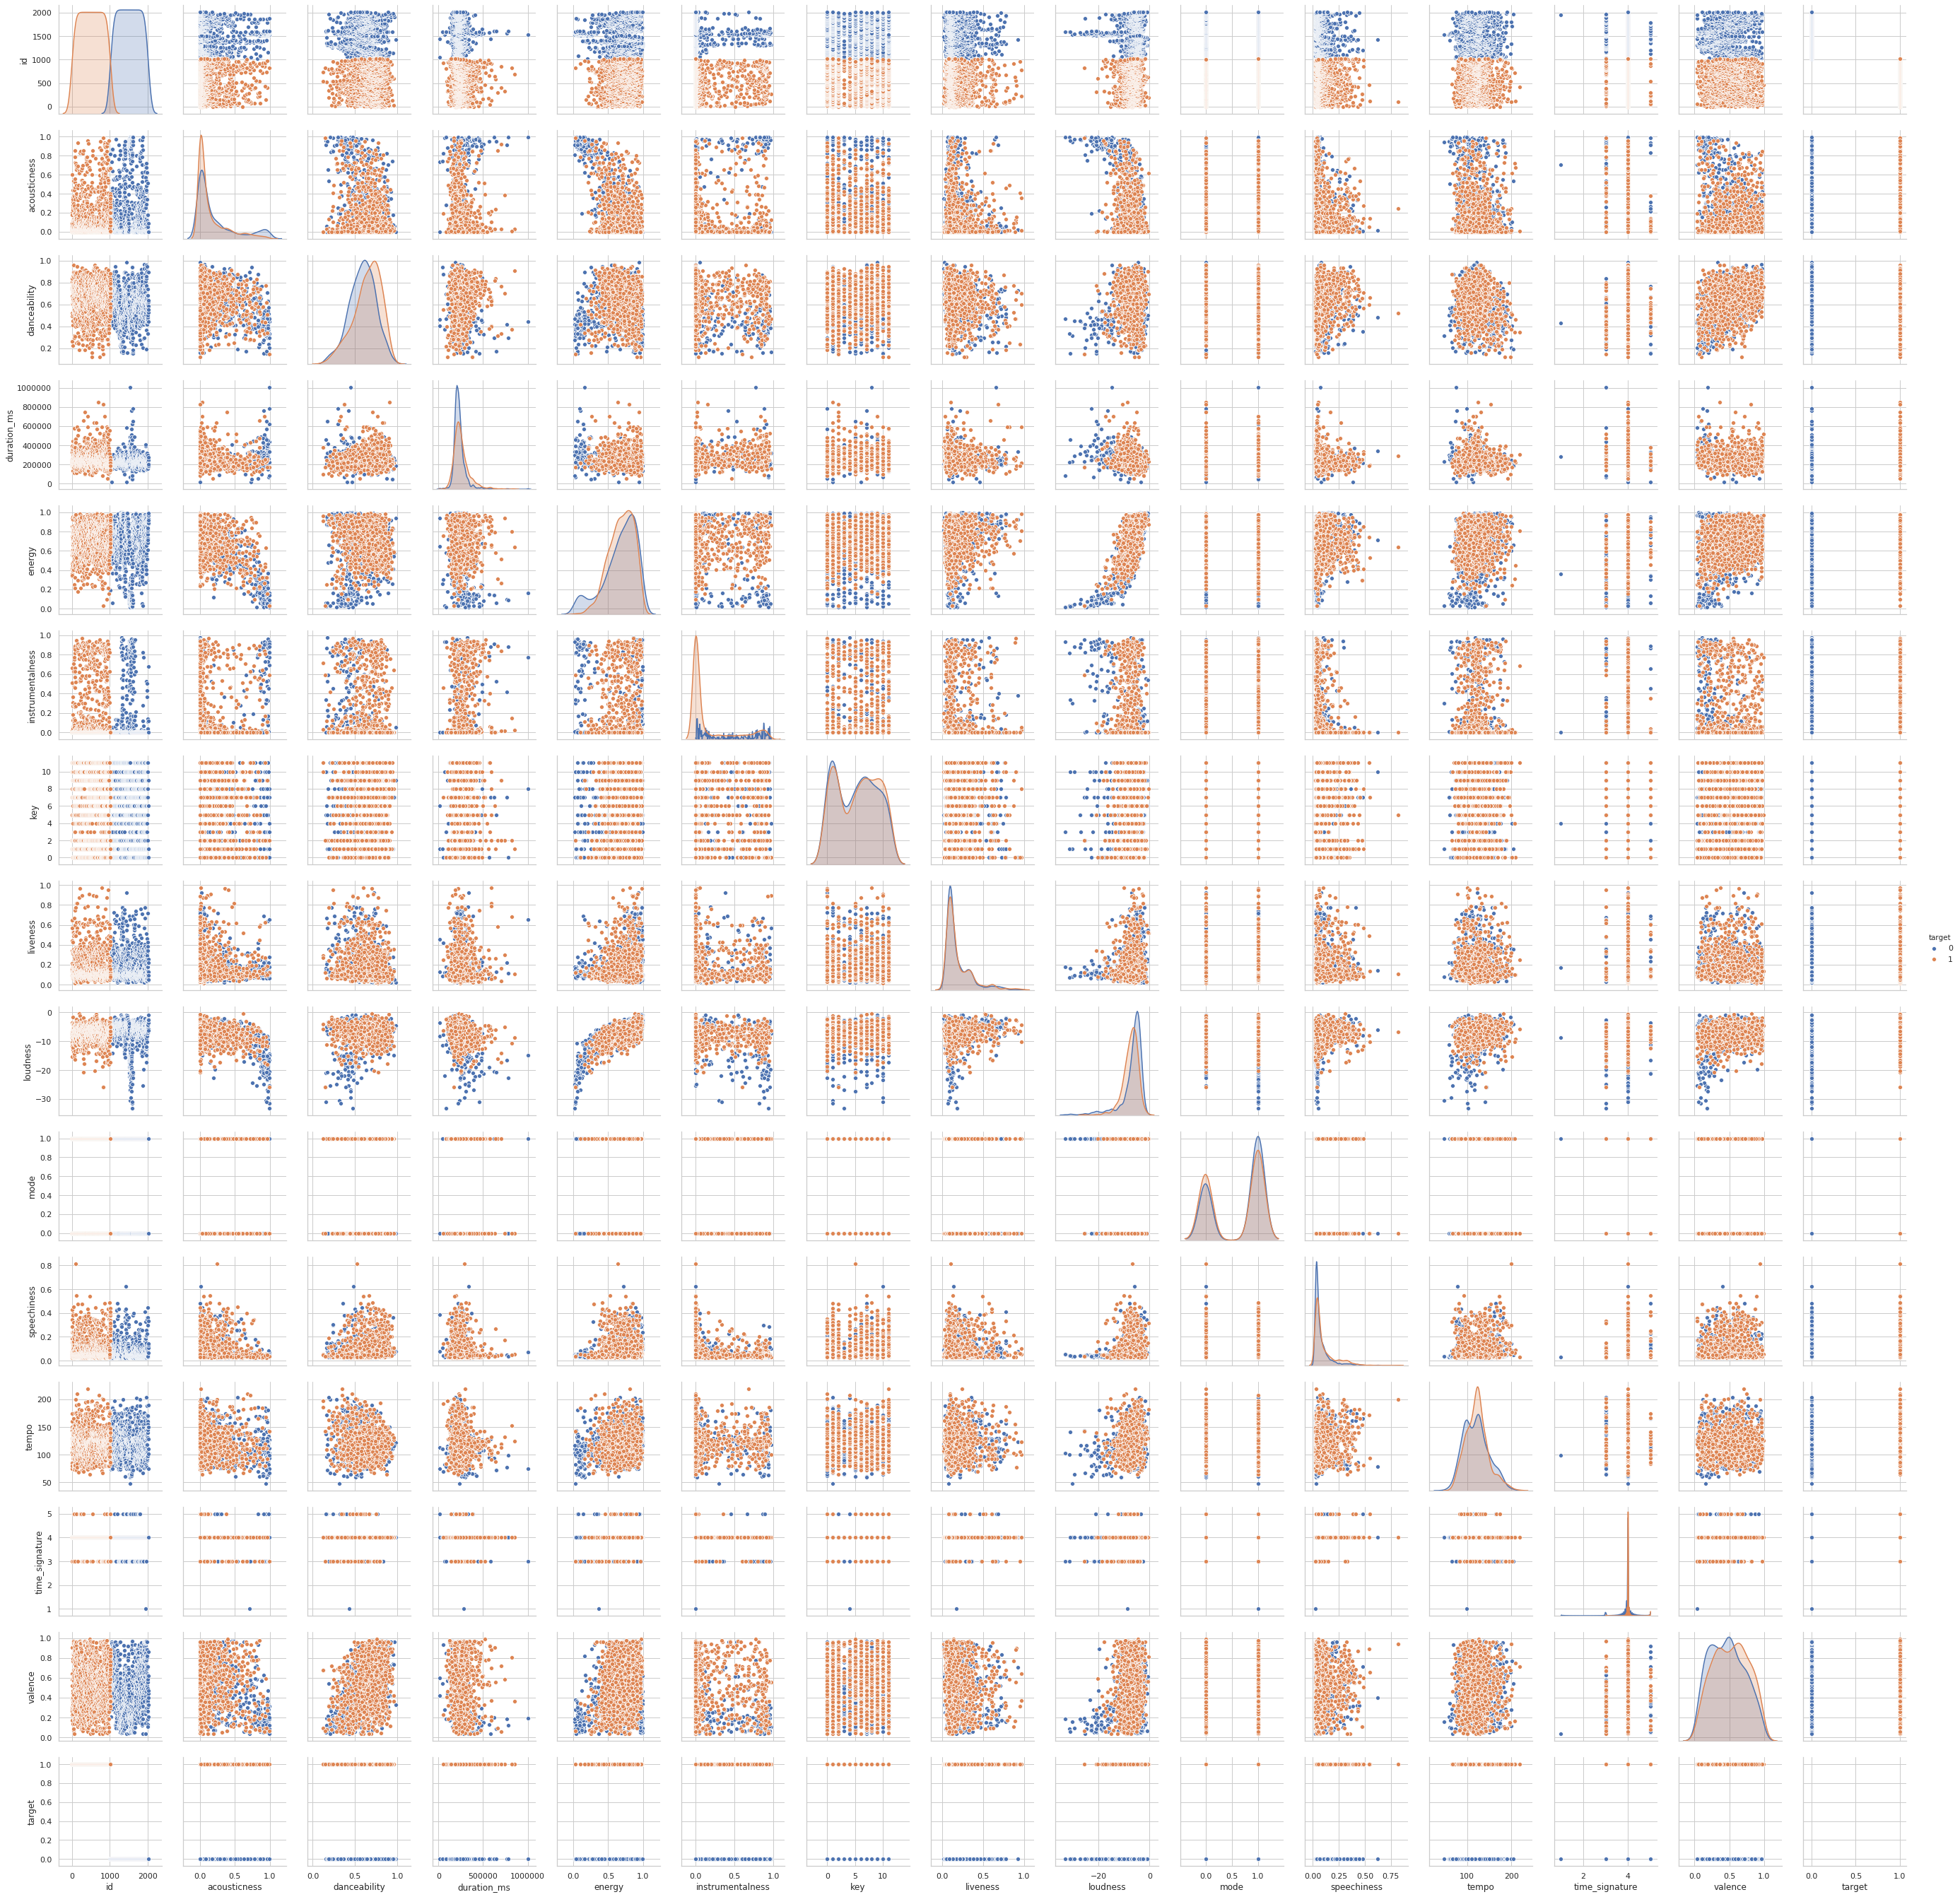

In [205]:
# Plotando a dispersão dos dados
g = sns.pairplot(df, hue='target')

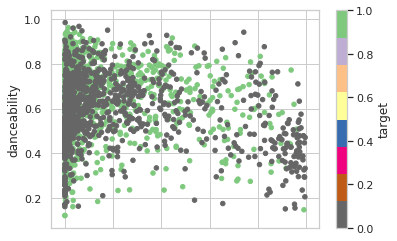

In [206]:
style.use("seaborn-colorblind")
df.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

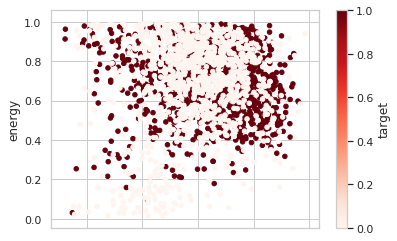

In [119]:
style.use("seaborn-colorblind")
df.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

In [207]:
df['artist'].value_counts()


Drake               16
Rick Ross           13
Disclosure          12
WALK THE MOON       10
Backstreet Boys     10
                    ..
Carnifex             1
Ellie Holcomb        1
Brantley Gilbert     1
Tove Lo              1
!!!                  1
Name: artist, Length: 1343, dtype: int64

# Gráfico com filtro

In [208]:
pip install plotly==4.4.1

In [209]:
import plotly.express as px
fig = px.scatter(df, x="acousticness", y="danceability", color="artist",
                 size='danceability', hover_data=['acousticness'])
fig.show()




# Pre-processamento de dados

### Dividindo dados em label e features

In [210]:
df.head()

id  acousticness  danceability  ...  target      song_title            artist
0   0        0.0102         0.833  ...       1        Mask Off            Future
1   1        0.1990         0.743  ...       1         Redbone  Childish Gambino
2   2        0.0344         0.838  ...       1    Xanny Family            Future
3   3        0.6040         0.494  ...       1  Master Of None       Beach House
4   4        0.1800         0.678  ...       1  Parallel Lines       Junior Boys

[5 rows x 17 columns]

In [0]:
# Função pare remover features
def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)
    return 0

In [212]:
# definindo o label
label = df['target']
remove_features(['target'])

0

In [151]:
label

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [213]:
df.head()

id  acousticness  danceability  ...  valence      song_title            artist
0   0        0.0102         0.833  ...    0.286        Mask Off            Future
1   1        0.1990         0.743  ...    0.588         Redbone  Childish Gambino
2   2        0.0344         0.838  ...    0.173    Xanny Family            Future
3   3        0.6040         0.494  ...    0.230  Master Of None       Beach House
4   4        0.1800         0.678  ...    0.904  Parallel Lines       Junior Boys

[5 rows x 16 columns]

In [0]:
# definindo as features - Identificando colunas categóricas (song_title e artist) e removendo colunas que não serão utilizadas pelo classificador

In [214]:
remove_features(['id','song_title'])

0

In [215]:
df.head()

acousticness  danceability  ...  valence            artist
0        0.0102         0.833  ...    0.286            Future
1        0.1990         0.743  ...    0.588  Childish Gambino
2        0.0344         0.838  ...    0.173            Future
3        0.6040         0.494  ...    0.230       Beach House
4        0.1800         0.678  ...    0.904       Junior Boys

[5 rows x 14 columns]

### Encode de valores categóricos

In [220]:
df.artist.head(10)

0              Future
1    Childish Gambino
2              Future
3         Beach House
4         Junior Boys
5               Drake
6               Drake
7               Omega
8         Death Grips
9         Honey Claws
Name: artist, dtype: object

In [0]:
# copia dos dados
df_transform = df.copy()


In [240]:
df_transform.head()

acousticness  danceability  ...  valence            artist
0        0.0102         0.833  ...    0.286            Future
1        0.1990         0.743  ...    0.588  Childish Gambino
2        0.0344         0.838  ...    0.173            Future
3        0.6040         0.494  ...    0.230       Beach House
4        0.1800         0.678  ...    0.904       Junior Boys

[5 rows x 14 columns]

In [0]:
# Aplicando o get_dummies nos dados para criar colunas no formato matriz de presença [colunas - dados categóricos,  linhas - presença]
dataset = pd.get_dummies(df_transform, columns=['artist'], prefix=['artist'])

In [242]:
# Visualizando 'features' geradas.
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [243]:
len(dataset.columns)

1356

In [244]:
# Visualizando as colunas
dataset.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1356, dtype: object

In [245]:
# checando missing values
dataset.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1356, dtype: int64

In [246]:
# coluna artist
len(dataset.columns)

1356

In [247]:
dataset.sample(10)

acousticness  ...  artist_플랫핏 Flat Feet
1878      0.211000  ...                     0
384       0.000429  ...                     0
606       0.000321  ...                     0
1097      0.004310  ...                     0
1579      0.652000  ...                     0
488       0.122000  ...                     0
508       0.024600  ...                     0
1039      0.335000  ...                     0
1625      0.001640  ...                     0
476       0.000963  ...                     0

[10 rows x 1356 columns]

### Dividindo em dados de treinamento e teste

In [0]:
# Separando o conjunto de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.30)

In [249]:
X_train.shape, X_test.shape

((1411, 1356), (606, 1356))

In [250]:
y_train.shape, y_test.shape

((1411,), (606,))

### Treinando o algoritmo

In [0]:
clf = SVC().fit(X_train, y_train)


In [252]:
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Fazendo previsões

In [0]:
# Resultados de predição
y_pred  = clf.predict(X_test)

In [254]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Avaliando o algoritmo

In [255]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[259  35]
 [230  82]]
              precision    recall  f1-score   support

           0       0.53      0.88      0.66       294
           1       0.70      0.26      0.38       312

    accuracy                           0.56       606
   macro avg       0.62      0.57      0.52       606
weighted avg       0.62      0.56      0.52       606

